In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
# Define constants
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [3]:
# append train data into dataframe divide the data into filename and category
# if filename contains cat it comes under 0 category otherwise in 1 category

filenames = os.listdir("D:\\cdac\\train\\train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(0)
    else:
        categories.append(1)
        
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
df

,filename,category
0,cat.0.jpg,1
1,cat.1.jpg,1
2,cat.10.jpg,1
3,cat.100.jpg,1
4,cat.1000.jpg,1
...,...,...
24995,dog.9995.jpg,0
24996,dog.9996.jpg,0
24997,dog.9997.jpg,0
24998,dog.9998.jpg,0


<AxesSubplot:xlabel='category', ylabel='count'>

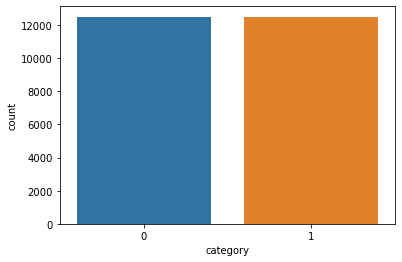

In [5]:
import seaborn as sns
sns.countplot(data = df,x = 'category')

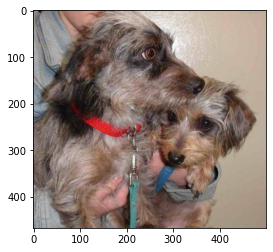

In [6]:
sample = random.choice(filenames)
image = load_img('D:\\cdac\\train\\train/'+sample)
plt.imshow(image)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3,3),activation = 'relu',input_shape = (IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [8]:
df['category'] = df['category'].replace({0 : 'Cat',1: 'Dog'})

In [9]:
train_df, validate_df = train_test_split(df,test_size = 0.2,random_state = True)

In [10]:
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

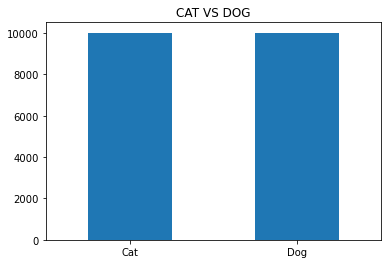

In [11]:
train_df['category'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title("CAT VS DOG")
plt.show()

In [12]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "D:\\cdac\\train\\train",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [14]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "D:\\cdac\\train\\train",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [15]:
example_df=train_df.sample(n=1).reset_index(drop=True)
example_generator=train_datagen.flow_from_dataframe(
example_df,
"D:/cdac/train/train/",
x_col='filename',
y_col='category',
target_size=IMAGE_SIZE,
class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


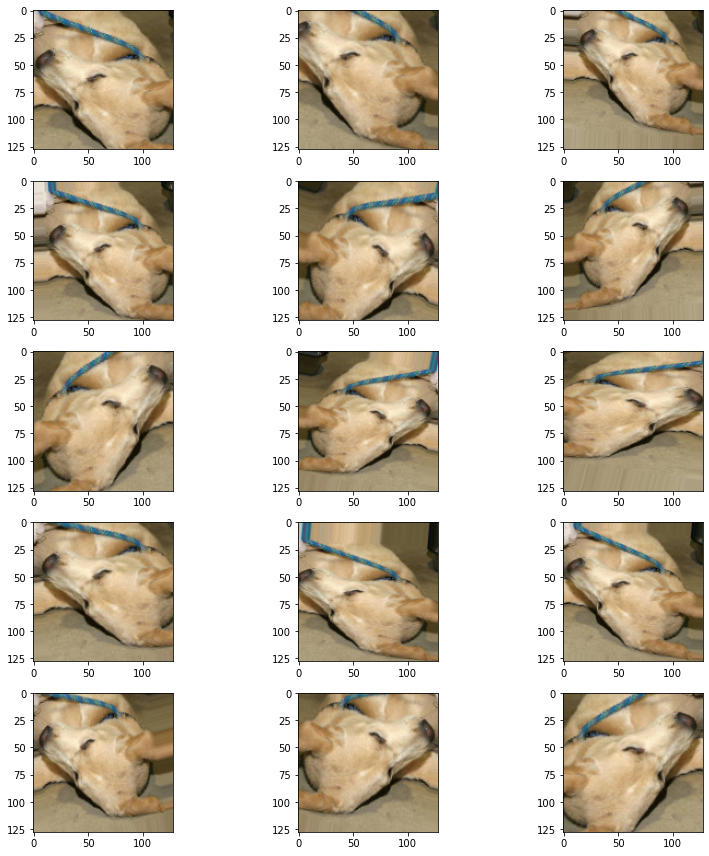

In [16]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_batch,y_batch in example_generator:
        image=x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


In [19]:
epochs = 3
history = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size
    )

C:\Users\ASUS\AppData\Local\Temp/ipykernel_30280/1751925333.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/3
1333/1333 [==============================] - 513s 385ms/step - loss: 0.6198 - accuracy: 0.6636 - val_loss: 0.6800 - val_accuracy: 0.6761
Epoch 2/3
1333/1333 [==============================] - 505s 379ms/step - loss: 0.5885 - accuracy: 0.6883 - val_loss: 0.5428 - val_accuracy: 0.7191
Epoch 3/3
1333/1333 [==============================] - 494s 371ms/step - loss: 0.5474 - accuracy: 0.7240 - val_loss: 0.5171 - val_accuracy: 0.7516


In [20]:
model.save_weights('model.h5')

In [21]:
model.save('Catv/sDog')

INFO:tensorflow:Assets written to: Catv/sDog\assets


In [22]:
#model.load_weights('model.h5')
# model = tf.keras.model.load_model(Catv/sDog)

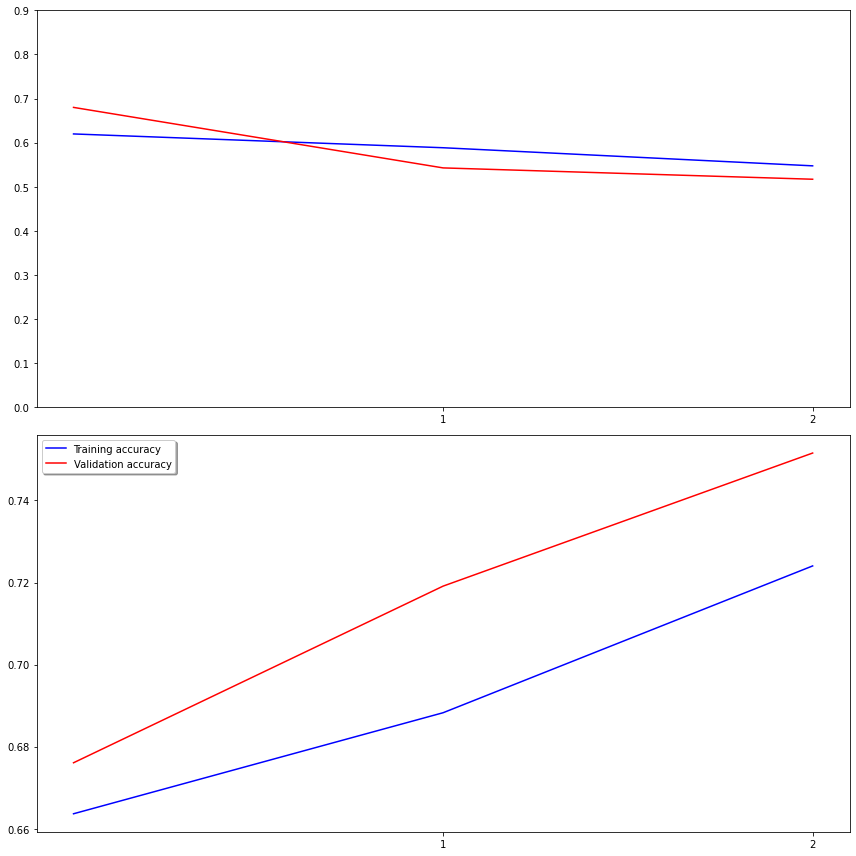

In [30]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (12,12))
ax1.plot(history.history['loss'],color = 'b',label = 'Training Loss')
ax1.plot(history.history['val_loss'],color = 'r',label = 'Validation Loss')
ax1.set_xticks(np.arange(1, epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(history.history['accuracy'], color = 'b',label = 'Training accuracy')
ax2.plot(history.history['val_accuracy'],color ='r',label = 'Validation accuracy')
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc = 'best', shadow = True)
plt.tight_layout()
plt.show()

In [31]:
test_filenames = os.listdir("D:\\cdac\\test1\\test1")
        
test_df = pd.DataFrame({
    'filename': test_filenames,
})

In [33]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "D:\\cdac\\test1\\test1",
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

Found 12500 validated image filenames.


In [43]:
predict = model.predict(test_generator)

In [44]:
test_df['Category'] = np.argmax(predict, axis = 1)
test_df.head()

,filename,Category
0,1.jpg,1
1,10.jpg,1
2,100.jpg,1
3,1000.jpg,0
4,10000.jpg,0


In [45]:
test_df['Category'] = test_df['Category'].replace({1:'Cat',0:'Dog'})
test_df.head()

,filename,Category
0,1.jpg,Cat
1,10.jpg,Cat
2,100.jpg,Cat
3,1000.jpg,Dog
4,10000.jpg,Dog


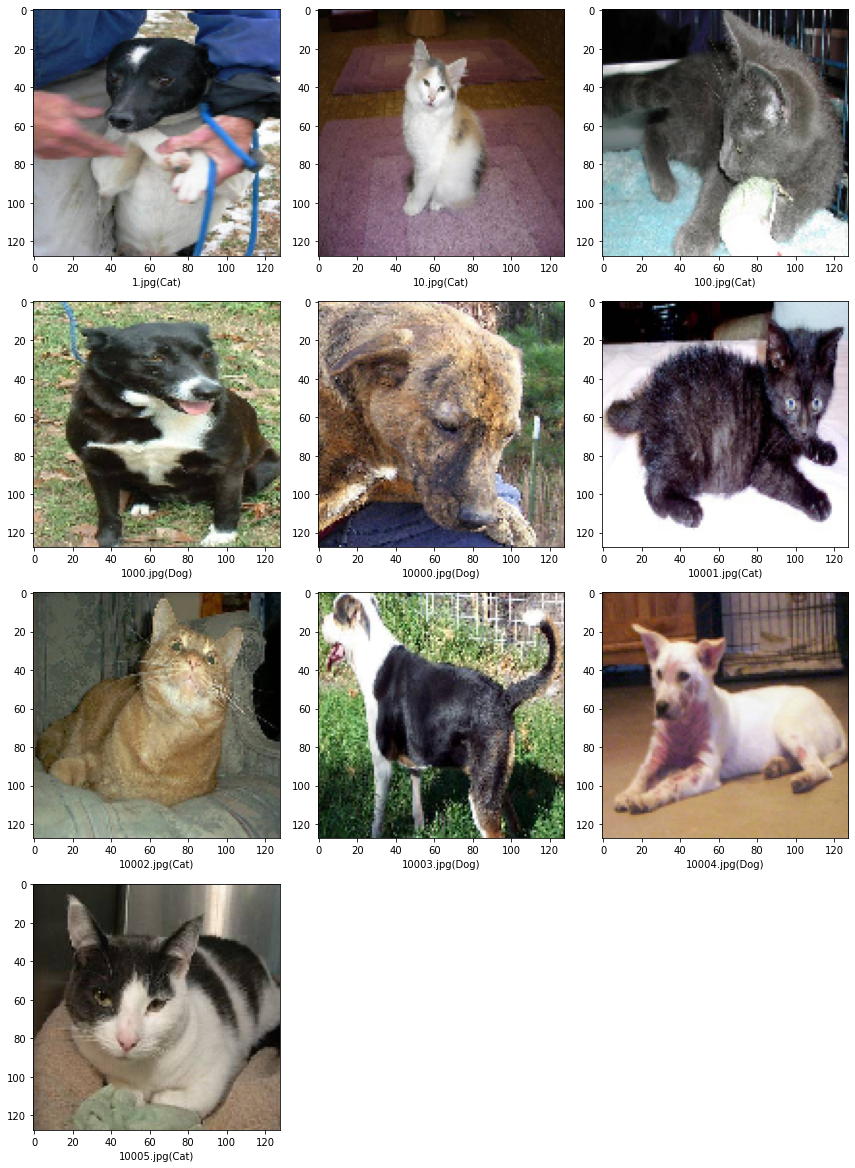

In [53]:
sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize = (12,24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['Category']
    img = load_img('D:\\cdac\\test1\\test1\\'+filename, target_size = IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename +'('+"{}".format(category)+')')
plt.tight_layout()
plt.show()